# Regularized Neural Network 

We'll use the MNIST data set of scanned images of handwritten digits, together with their correct classification. mnist_loader module is the modified version of the module developed by [Micheal Nielsen](https://michaelnielsen.org/). I also have benefited a good deal by using recomendations on improving neural network's performance made by Micheal on his great book, [Neuaral Networks and Deap Learning](http://neuralnetworksanddeeplearning.com/). 

Importing required libraries and developed neural network class as snetc

In [5]:

# -*- coding: utf-8 -*-
"""
Created on Wed Jan 13 18:35:28 2021

@author: zayn
"""

import sys
sys.path.append('../software/algorithms/') 
sys.path.append('../software/utilities/') 

    
from importlib import reload
import snetw as snetc
import mnist_loader
import matplotlib.pyplot as plt 
reload(mnist_loader)
reload(snetc)


<module 'snetw' from '../software/algorithms\\snetw.py'>

 Loading Data..., The structure for data is well explained inside  mnist_loader module,So I won't delve into that. 

In [6]:
training_data, validation_data, test_data = \
    mnist_loader.load_data_wrapper('../data/mnist.pkl.gz')


training_data=list(training_data)

Creating a 3-stage (customizable) neural nework with 784 input layers (the size of input data array), 30 hidden layers (customizable), and 10 output layers (the size of classified output digits 0-9). Feel free to modify custumizable parameters.

In [7]:
snet=snetc.nnet([784, 30,10])

Visualizing a random selection of the data  set to get a sense of what are we dealing with. 

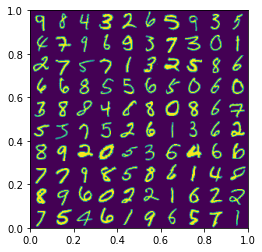

In [8]:
ax=snet.plotData(training_data)


Weighs and biases, as explaind in chapter three of  [Neuaral Networks and Deap Learning](http://neuralnetworksanddeeplearning.com/), are initialized to Gaussian random varialble with mean zero, and appropriate variances.   

In [9]:
iweights=snet.weights
ibiases=snet.biases

rlambda is the regularization parameter, and alpha is the leaning rate for the stochastic gradient descent(GD) algorithm used to obtain optimum weights and biases for the network. num_passes determines the number of iterations of GD algorithm over input training data. batch_size is the number of training data used in each single run of GD algorithm. These hyper parameters for neural network are better to be set using relevant strategies such as evaluting different configuration on validation data. Nevertheless, the following parameters work fairly well for our case. 

In [ ]:
rlambda=5.0
alpha=0.5
num_passes=30
batch_size=10

Optimizing neural network weights, and biases, and evaluating its performance on test_data. The performance is close to 96%.

In [10]:
snet.nnGraDescent(training_data,num_passes,batch_size,alpha,test_data, rlambda)

iteration 0:93.85%
iteration 1:95.40%
iteration 2:95.36%
iteration 3:94.71%
iteration 4:95.62%
iteration 5:95.44%
iteration 6:94.67%
iteration 7:95.70%
iteration 8:95.89%
iteration 9:96.11%
iteration 10:95.86%
iteration 11:95.85%
iteration 12:95.53%
iteration 13:95.77%
iteration 14:95.74%
iteration 15:95.59%
iteration 16:95.61%
iteration 17:95.80%
iteration 18:95.98%
iteration 19:95.85%
iteration 20:95.79%
iteration 21:96.03%
iteration 22:95.51%
iteration 23:96.06%
iteration 24:95.70%
iteration 25:95.71%
iteration 26:95.37%
iteration 27:95.66%
iteration 28:95.68%
iteration 29:95.40%


It shouldn't surprise you that reularized cost function is not monotically decreasing. After all it was not a convex function of weights and biases in the first place. Nevertheless, the overall trend seems to be decreasing. 

Text(0, 0.5, 'Cost')

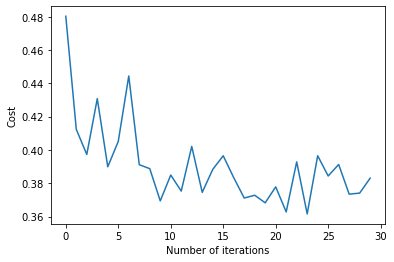

In [12]:
fig, ax = plt.subplots()
ax.plot(range(len(snet.J_h)), snet.J_h)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost')